<a href="https://colab.research.google.com/github/KijoSal-dev/machine-learning/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
7,WDC0G5EB0K,Yakima,Naches,WA,98937.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,14.0,338148968,POINT (-120.69972 46.7309),PACIFICORP,5.307700e+10
8,1N4AZ0CP3D,Kitsap,Port Orchard,WA,98366.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26.0,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
9,KNDCC3LD9K,Kitsap,Olalla,WA,98359.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10


,County,Electric Range,Base MSRP,importance_score,predicted_ev_adoption_rate
0,Yakima,322,0,0,0.005509
1,San Diego,220,0,0,0.000176
2,Lane,22,0,0,0.000008
3,Yakima,289,0,0,0.005509
4,Snohomish,14,0,0,0.112744


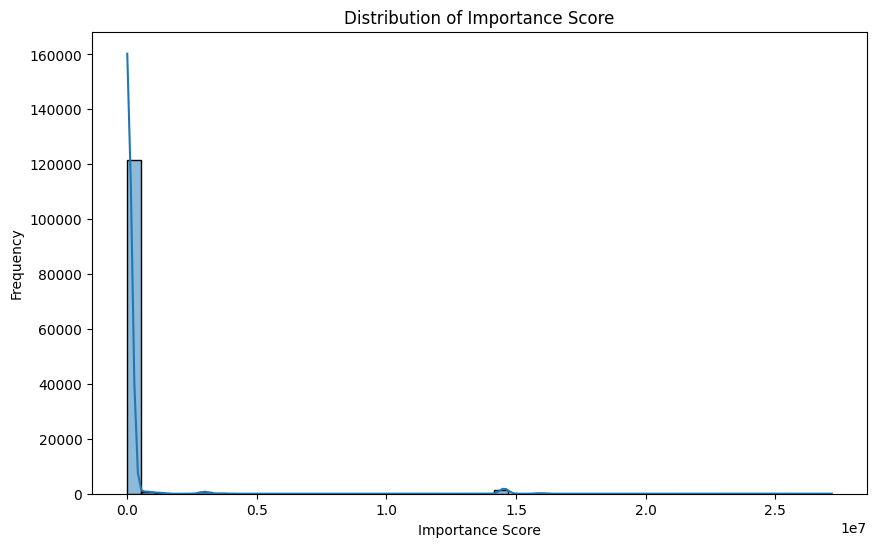

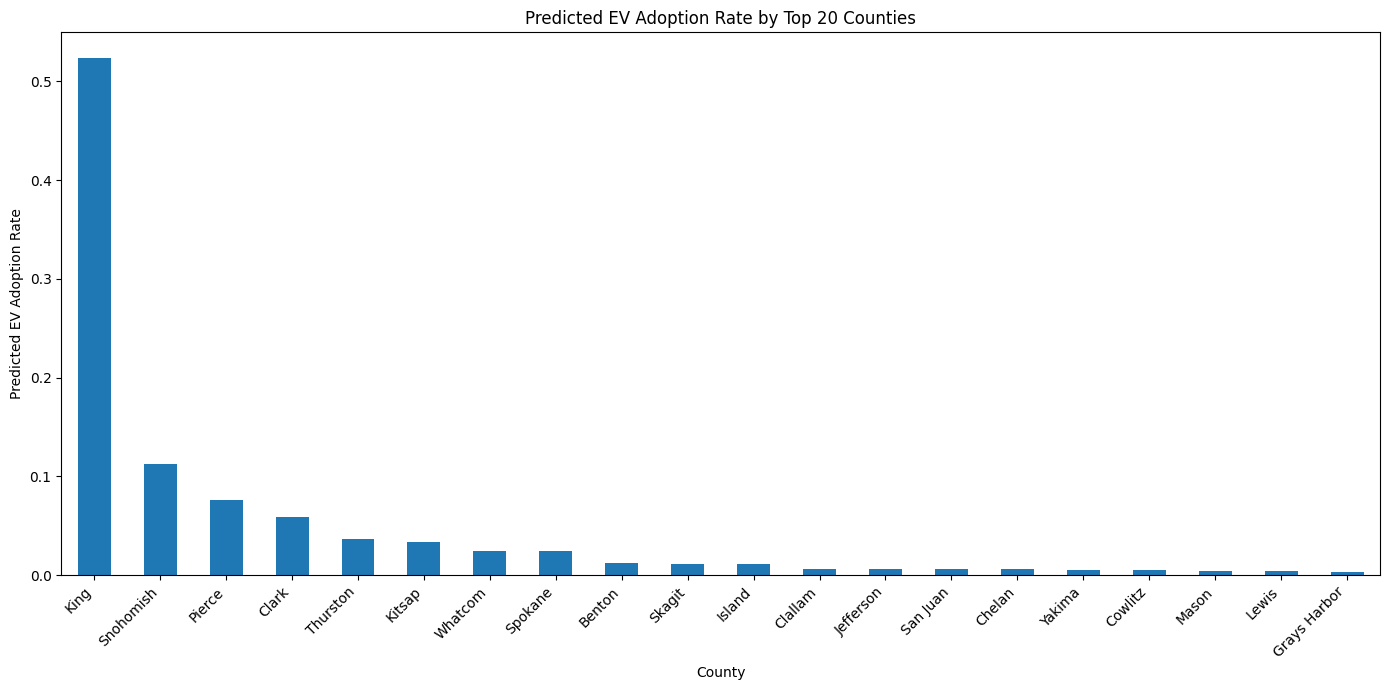

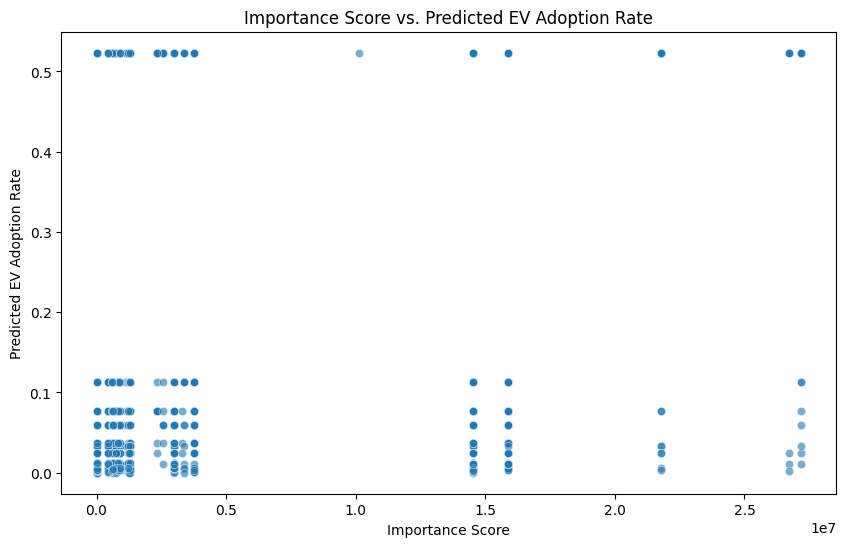

In [9]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)  # Display all columns

# Assuming the CSV file is uploaded to the current directory
try:
    df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
except FileNotFoundError:
    print("Error: 'Electric_Vehicle_Population_Data.csv' not found. Please ensure the file is uploaded.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors

if not df.empty:
    # View first 10 value on the Dataframe
    display(df.head(10))

    # Check for required columns
    required_columns = ['Electric Range', 'Base MSRP', 'County']
    if all(col in df.columns for col in required_columns):

        # Calculate 'importance_score'
        df['importance_score'] = df['Electric Range'] * df['Base MSRP']

        # Calculate 'predicted_ev_adoption_rate'
        county_counts = df['County'].value_counts()
        df['predicted_ev_adoption_rate'] = df['County'].map(county_counts / len(df))

        display(df[['County', 'Electric Range', 'Base MSRP', 'importance_score', 'predicted_ev_adoption_rate']].head())

        # 1. Histogram of 'importance_score'
        plt.figure(figsize=(10, 6))
        sns.histplot(df['importance_score'], bins=50, kde=True)
        plt.title('Distribution of Importance Score')
        plt.xlabel('Importance Score')
        plt.ylabel('Frequency')
        plt.show()

        # 2. Bar plot of 'predicted_ev_adoption_rate' by 'County'
        # To make the plot readable, let's select the top 20 counties by adoption rate
        county_adoption_rate = df.groupby('County')['predicted_ev_adoption_rate'].mean().sort_values(ascending=False).head(20)

        plt.figure(figsize=(14, 7))
        county_adoption_rate.plot(kind='bar')
        plt.title('Predicted EV Adoption Rate by Top 20 Counties')
        plt.xlabel('County')
        plt.ylabel('Predicted EV Adoption Rate')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 3. Scatter plot of 'importance_score' vs. 'predicted_ev_adoption_rate'
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x='importance_score', y='predicted_ev_adoption_rate', alpha=0.6)
        plt.title('Importance Score vs. Predicted EV Adoption Rate')
        plt.xlabel('Importance Score')
        plt.ylabel('Predicted EV Adoption Rate')
        plt.show()
    else:
        print("Error: Missing one or more required columns ('Electric Range', 'Base MSRP', 'County'). Please check the CSV file.")
        print("Available columns:", df.columns.tolist())
else:
    print("DataFrame is empty. Cannot proceed with calculations and visualizations.")